In [1]:
from src.knn import *
from matplotlib import pyplot as plt
import pandas as pd
from math import floor
import numpy as np

In [2]:
df = pd.read_csv('datasets/german_credit.data')
pd.set_option('display.max_columns', df.shape[1])
df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,C
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
df.describe()

,P2,P5,P8,P11,P13,P16,P18,C
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


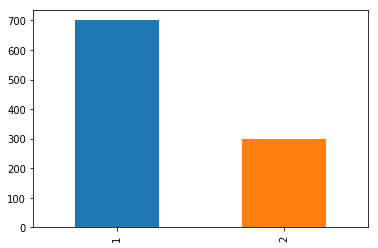

In [4]:
df['C'].value_counts().plot(kind='bar')

In [7]:
n_fold = 10
data = df.values
np.random.shuffle(data)
mod = data.shape[0] % n_fold
data = data[mod:]
print(data.shape)

k_values = [1,2,3,5,7,9,11,13,15]
accs = []
weighted_accs = []

print("---------------------KNN---------------------")
accs = cross_validation(data, 10, k_values, data_type=2, dataframe=df)
for i in range(len(accs)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], accs[i]))
    
print("\n---------------------WEIGHTED KNN---------------------")
weighted_accs = cross_validation(data, 10, k_values, data_type=2, dataframe=df, with_weight=True)
for i in range(len(accs)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], weighted_accs[i]))

(1000, 21)
---------------------KNN---------------------
The accuracy for k = 1 is: 70.20%
The accuracy for k = 2 is: 73.50%
The accuracy for k = 3 is: 72.60%
The accuracy for k = 5 is: 74.70%
The accuracy for k = 7 is: 74.90%
The accuracy for k = 9 is: 74.80%
The accuracy for k = 11 is: 74.10%
The accuracy for k = 13 is: 74.80%
The accuracy for k = 15 is: 74.20%

---------------------WEIGHTED KNN---------------------
The accuracy for k = 1 is: 70.20%
The accuracy for k = 2 is: 70.20%
The accuracy for k = 3 is: 72.50%
The accuracy for k = 5 is: 75.00%
The accuracy for k = 7 is: 75.30%
The accuracy for k = 9 is: 74.80%
The accuracy for k = 11 is: 74.10%
The accuracy for k = 13 is: 74.40%
The accuracy for k = 15 is: 74.60%
